In [39]:
import pandas as pd, tensorflow as tf, matplotlib.pyplot as plt, numpy as np, os
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import mean_squared_error
from   tensorflow import keras
from   math import sqrt
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import pydot
import graphviz
from tensorflow.keras.callbacks import TensorBoard

In [40]:
#Data Base Import
db=pd.read_excel(r'D:\ToolBox\.py\rep_1\data\processed\db.xlsx')

#Data Extraction
y1 = db ["As_opt"]
y2 = db ["d_opt"]
y3 = db ["As_opt_p"]
x  = db [["fc","fy","Mu","b"]]

#RMSE def
def rmse(ytrue,ypred):
  return tf.sqrt(tf.reduce_mean(tf.square(ytrue - ypred)))

In [41]:
#Split: DataBase into: Training and Testing Data
xtrain,xtest,ytrain1,ytest1,ytrain2,ytest2,ytrain3,ytest3 = train_test_split(x,y1,y2,y3,test_size=0.2,random_state=1) 

In [42]:
# Auto-Saving Model Training: Callback ModelCheckpoint
checkpoint = ModelCheckpoint(r'D:\ToolBox\py\proyect_1\RedesNeuronales\mdl_checkpoint_1.0.keras', monitor='val_loss', save_best_only=True)
# Define un callback de TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs')

In [106]:
# Model: Arquitecture
n1= 40; n2= 40; n3= 40; n4= 40; total_neurons = n1+ n2+ n3+ n4; total_layers = 4

input_layer = tf.keras.layers.Input(shape=(xtrain.shape[1],))
hidden_layer = tf.keras.layers.Dense(n1, activation="relu", name="Densa_1")(input_layer)
hidden_layer = tf.keras.layers.Dense(n2, activation="relu", name="Densa_1")(hidden_layer)
hidden_layer = tf.keras.layers.Dense(n3, activation="relu", name="Densa_1")(hidden_layer)
hidden_layer = tf.keras.layers.Dense(n4, activation="relu", name="Densa_1")(hidden_layer)

output1 = tf.keras.layers.Dense(1, name="As_opt")(hidden_layer)  # Primera salida
output2 = tf.keras.layers.Dense(1, name="d_opt")(hidden_layer)  # Segunda salida
output3 = tf.keras.layers.Dense(1, name="As_opt_p")(hidden_layer)  # Tercera salida

mdl = tf.keras.Model(inputs=input_layer, outputs=[output1, output2, output3])

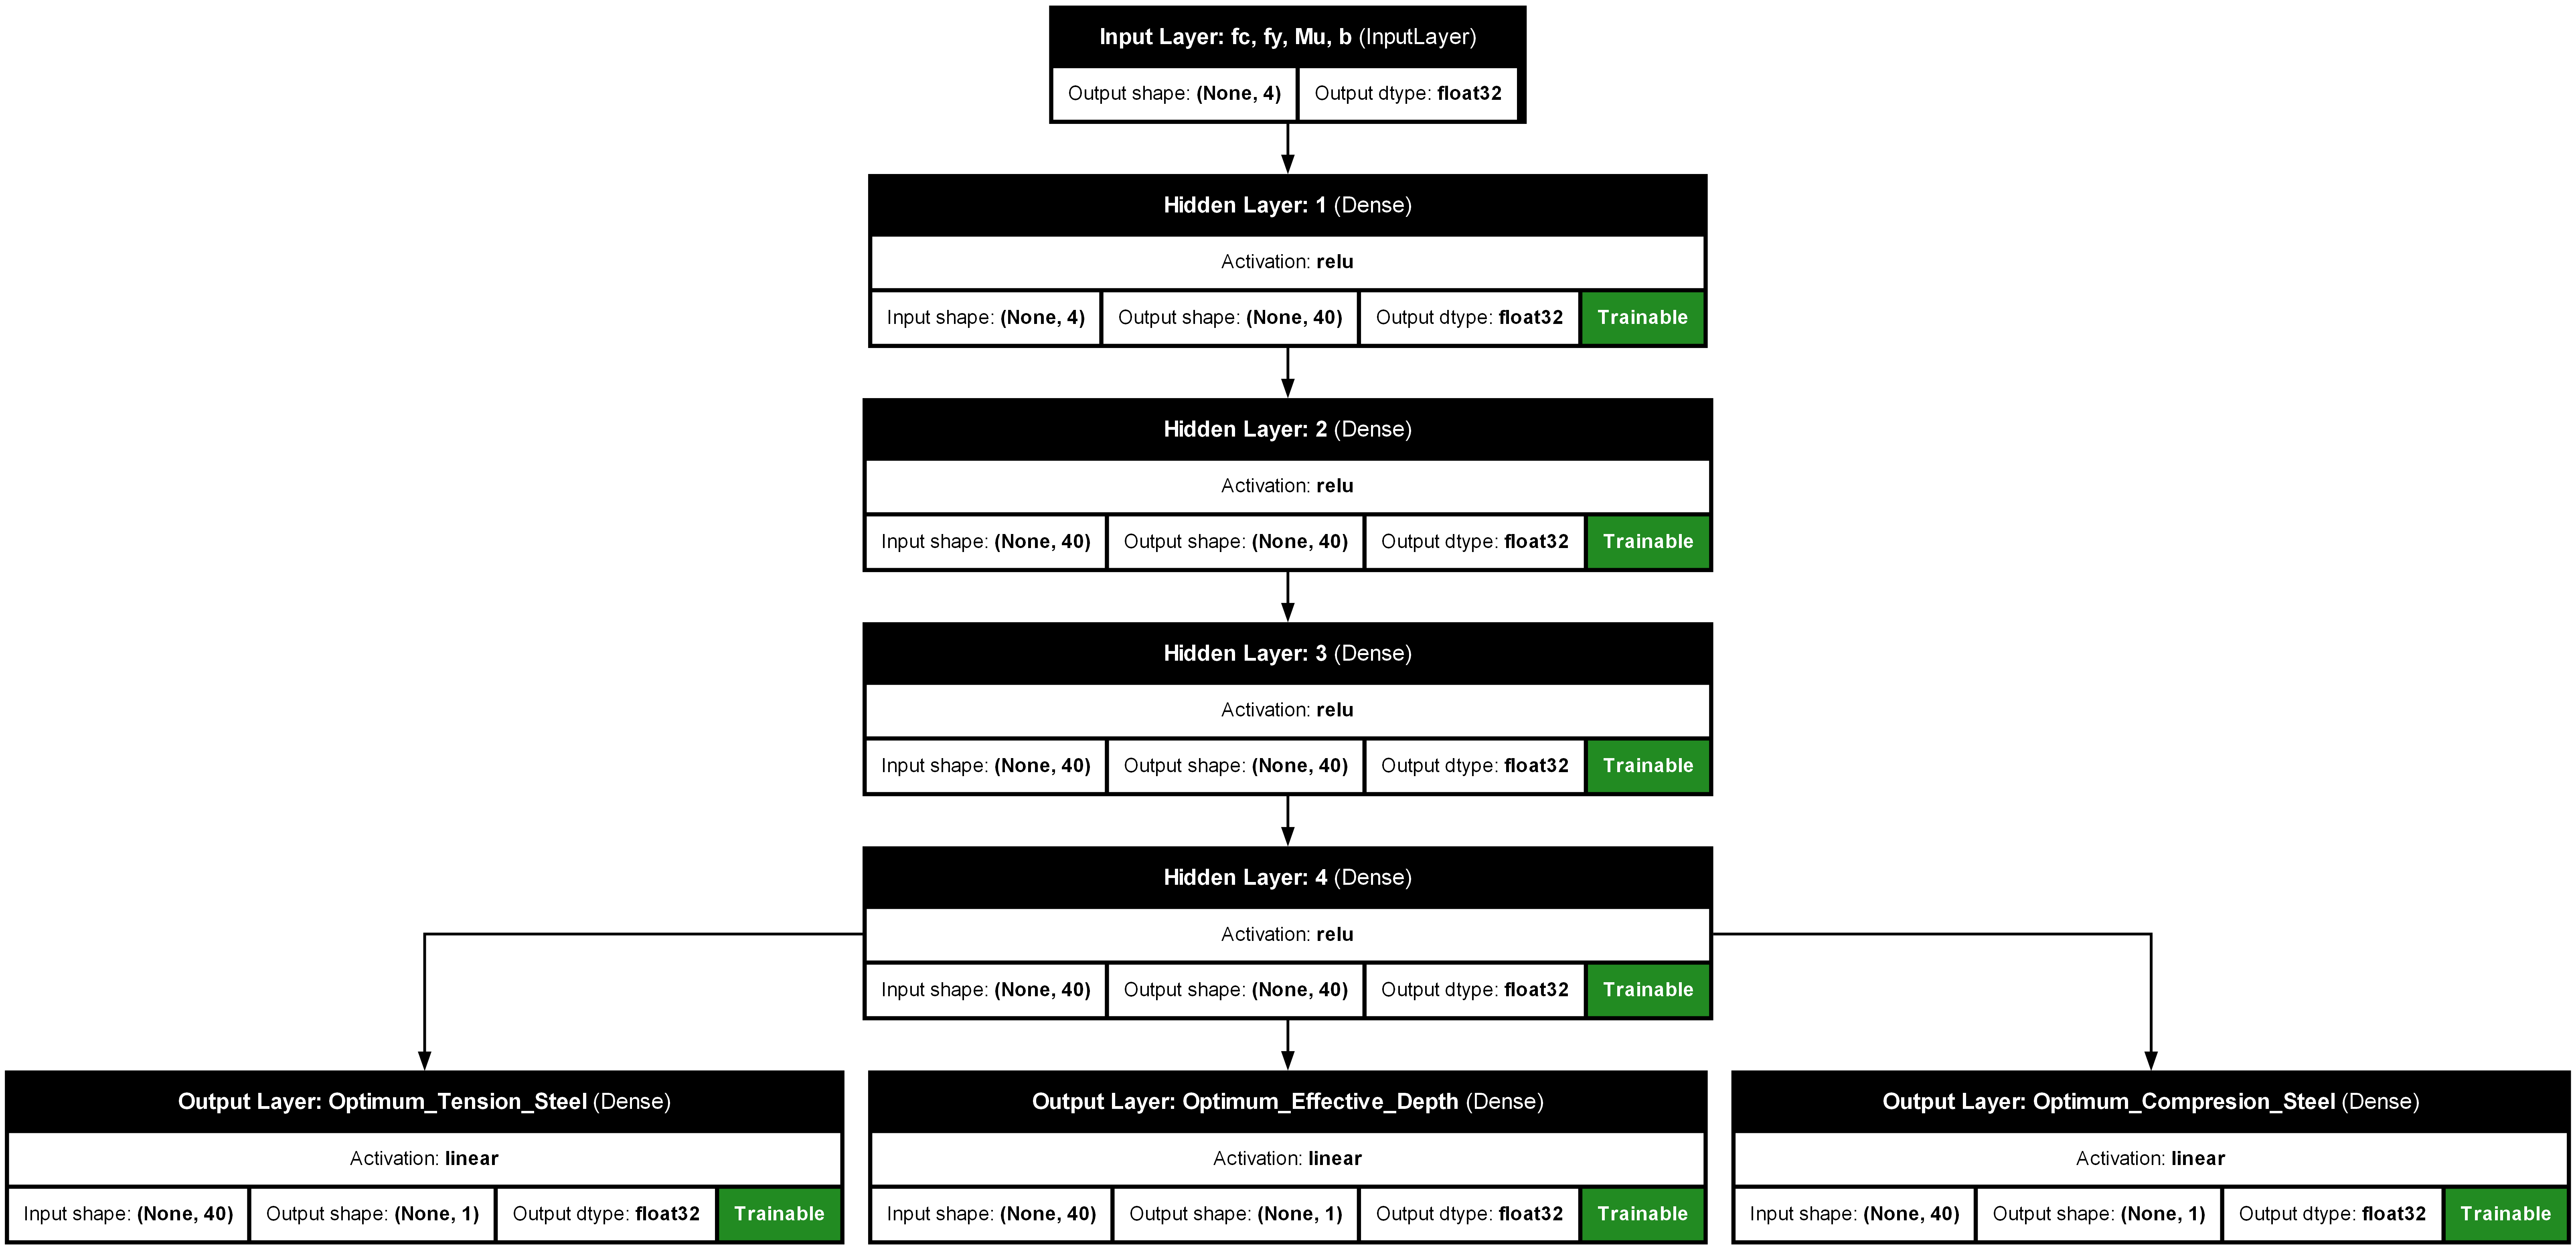

In [127]:
from tensorflow.keras.utils import plot_model

# Model: Arquitecture
n1= 40; n2= 40; n3= 40; n4= 40; total_neurons = n1+ n2+ n3+ n4; total_layers = 4

input_layer = tf.keras.layers.Input(shape=(xtrain.shape[1],), name="Input Layer: fc, fy, Mu, b")
hidden_layer = tf.keras.layers.Dense(n1, activation="relu", name="Hidden Layer: 1")(input_layer)
hidden_layer = tf.keras.layers.Dense(n2, activation="relu", name="Hidden Layer: 2")(hidden_layer)
hidden_layer = tf.keras.layers.Dense(n3, activation="relu", name="Hidden Layer: 3")(hidden_layer)
hidden_layer = tf.keras.layers.Dense(n4, activation="relu", name="Hidden Layer: 4")(hidden_layer)

output1 = tf.keras.layers.Dense(1, name="Output Layer: Optimum_Tension_Steel")(hidden_layer)  # Primera salida
output2 = tf.keras.layers.Dense(1, name="Output Layer: Optimum_Effective_Depth")(hidden_layer)  # Segunda salida
output3 = tf.keras.layers.Dense(1, name="Output Layer: Optimum_Compresion_Steel")(hidden_layer)  # Tercera salida

mdl_scheme = tf.keras.Model(inputs=input_layer, outputs=[output1, output2, output3])

# Define the layer names
layer_names = {
    "input_1": "Entrada",
    "dense": "Densa",
    "As_opt": "Optimum Tension Steel",
    "d_opt": "Optimum Effective Depth",
    "As_opt_p": "Optimum Compresion Steel"
}

# Rename the layers in the model
for layer in mdl.layers:
    if layer.name in layer_names:
        layer.name = layer_names[layer.name]

# Plot the model
plot_model(mdl_scheme, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, show_dtype=True, rankdir='TB',
           expand_nested=True, dpi=250, show_layer_activations=True, show_trainable=True)

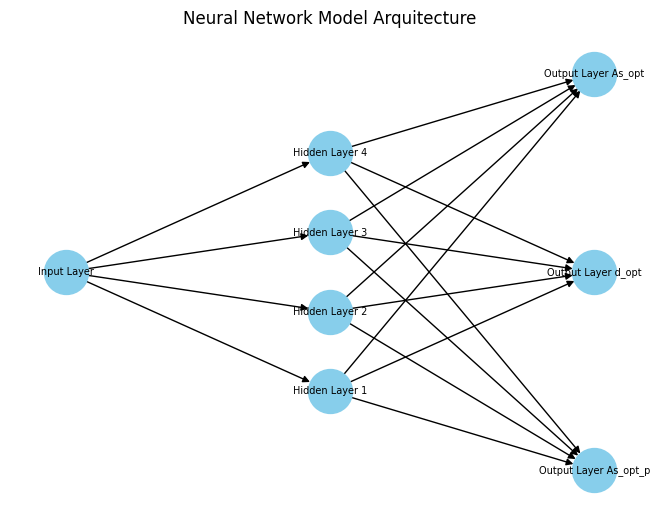

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import networkx as nx
import matplotlib.pyplot as plt

# Plotting the model graph
plot_model(mdl, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# NetworkX Graph
# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Input Layer", pos=(0, 2.5))
for i in range(1, 5):
    G.add_node(f"Hidden Layer {i}", pos=(2.5, i))
G.add_node("Output Layer As_opt", pos=(5, 5))
G.add_node("Output Layer d_opt", pos=(5, 2.5))
G.add_node("Output Layer As_opt_p", pos=(5, 0))

# Add edges
for i in range(1, 5):
    G.add_edge("Input Layer", f"Hidden Layer {i}")
    G.add_edge(f"Hidden Layer {i}", "Output Layer As_opt")
    G.add_edge(f"Hidden Layer {i}", "Output Layer d_opt")
    G.add_edge(f"Hidden Layer {i}", "Output Layer As_opt_p")

# Get node positions
pos = nx.get_node_attributes(G, "pos")

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=7, font_color="black")
plt.title("Neural Network Model Arquitecture")
plt.show()

In [ ]:
# Times the model will be trained
epochs = 10

In [25]:
total_epochs = 0

In [48]:
# Stats: Model 
mdl.summary()
print(mdl.weights)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 40)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ As_opt (Dense)                  │ (None, 1)              │            41 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ d_opt (Dense)                   │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ As_opt_p (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,165 (20.18 KB)

 Trainable params: 5,165 (20.18 KB)

 Non-trainable params: 0 (0.00 B)

[<KerasVariable shape=(4, 40), dtype=float32, path=sequential_1/dense_4/kernel>, <KerasVariable shape=(40,), dtype=float32, path=sequential_1/dense_4/bias>, <KerasVariable shape=(40, 40), dtype=float32, path=sequential_1/dense_5/kernel>, <KerasVariable shape=(40,), dtype=float32, path=sequential_1/dense_5/bias>, <KerasVariable shape=(40, 40), dtype=float32, path=sequential_1/dense_6/kernel>, <KerasVariable shape=(40,), dtype=float32, path=sequential_1/dense_6/bias>, <KerasVariable shape=(40, 40), dtype=float32, path=sequential_1/dense_7/kernel>, <KerasVariable shape=(40,), dtype=float32, path=sequential_1/dense_7/bias>, <KerasVariable shape=(40, 1), dtype=float32, path=sequential_1/As_opt/kernel>, <KerasVariable shape=(1,), dtype=float32, path=sequential_1/As_opt/bias>, <KerasVariable shape=(1, 1), dtype=float32, path=sequential_1/d_opt/kernel>, <KerasVariable shape=(1,), dtype=float32, path=sequential_1/d_opt/bias>, <KerasVariable shape=(1, 1), dtype=float32, path=sequential_1/As_opt_

In [27]:
# Model Conpiling
mdl.compile(optimizer='adam', loss=rmse ,metrics={'As_opt': 'accuracy', 'd_opt': 'accuracy', 'As_opt_p': 'accuracy'})

In [28]:
# Model Parameters Training 
mdl_fit = mdl.fit(xtrain, {"As_opt": ytrain1, "d_opt": ytrain2, "As_opt_p": ytrain3},
    epochs=epochs,
    verbose=True, 
    validation_split=0.05,
    callbacks=[checkpoint, tensorboard_callback])
total_epochs += epochs
total_epochs

Epoch 1/10
2494/2494 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - As_opt_accuracy: 0.0000e+00 - As_opt_p_accuracy: 0.0000e+00 - d_opt_accuracy: 0.0000e+00 - loss: 5.4707 - val_As_opt_accuracy: 0.0000e+00 - val_As_opt_p_accuracy: 0.0000e+00 - val_d_opt_accuracy: 0.0000e+00 - val_loss: 2.0584
Epoch 2/10
2494/2494 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - As_opt_accuracy: 0.0000e+00 - As_opt_p_accuracy: 0.0000e+00 - d_opt_accuracy: 0.0000e+00 - loss: 1.9395 - val_As_opt_accuracy: 0.0000e+00 - val_As_opt_p_accuracy: 0.0000e+00 - val_d_opt_accuracy: 0.0000e+00 - val_loss: 1.6472
Epoch 3/10
2494/2494 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - As_opt_accuracy: 0.0000e+00 - As_opt_p_accuracy: 0.0000e+00 - d_opt_accuracy: 0.0000e+00 - loss: 1.7113 - val_As_opt_accuracy: 0.0000e+00 - val_As_opt_p_accuracy: 0.0000e+00 - val_d_opt_accuracy: 0.0000e+00 - val_loss: 1.2990
Epoch 4/10
2494/2494 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - As_opt_accuracy: 0.0000e+00 - As_opt_p_accuracy: 0.0000e+00 - d_opt_accuracy: 0.0000e+00 - loss: 

10

In [18]:
# Stats: Model Parameters Training 
print(mdl_fit.history)

{'As_opt_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'As_opt_p_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'd_opt_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'loss': [1.4923394918441772, 1.4269866943359375, 1.3789786100387573, 1.3476550579071045, 1.3172856569290161, 1.2961782217025757, 1.258513331413269, 1.226416826248169, 1.1833882331848145, 1.1901564598083496], 'val_As_opt_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'val_As_opt_p_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'val_d_opt_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'val_loss': [1.3982667922973633, 1.660089373588562, 1.3705377578735352, 2.087524652481079, 1.4098176956176758, 1.0687172412872314, 1.924900770187378, 1.1720839738845825, 1.401334524154663, 1.3858731985092163]}


2625/2625 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


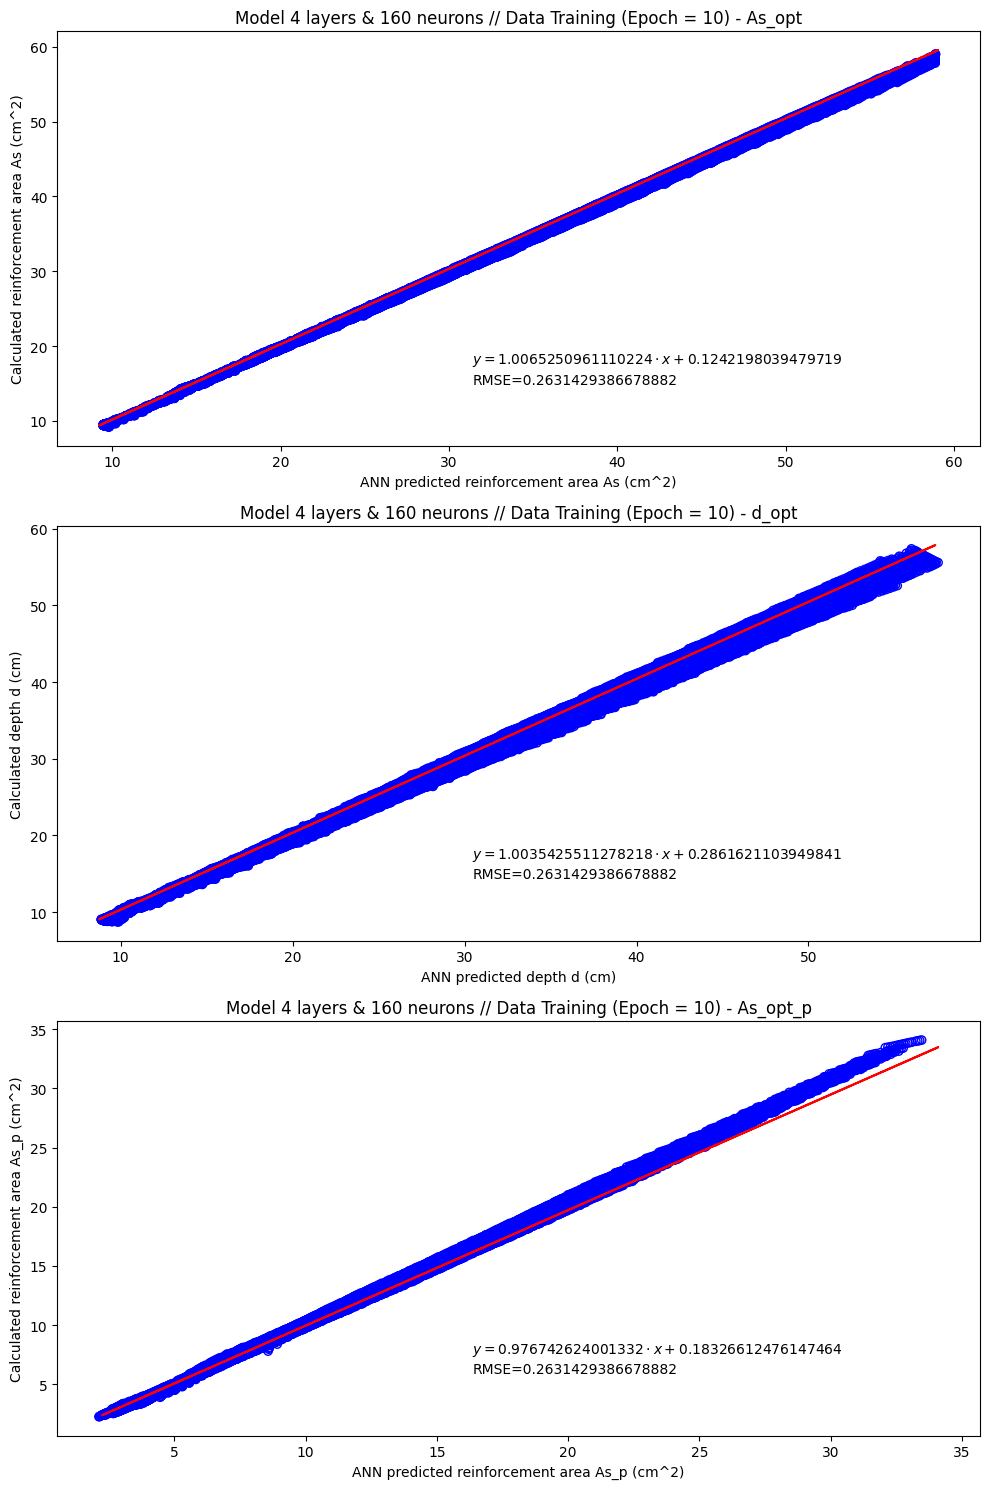

In [19]:
# COMPARING PREDICTED VALUES VS THEORETICAL VALUES
predictions = mdl.predict(xtrain)

# Las predicciones serán una lista de arrays, uno por cada salida
ypred1 = predictions[0].flatten()  # Predicciones para As_opt
ypred2 = predictions[1].flatten()  # Predicciones para d_opt
ypred3 = predictions[2].flatten()  # Predicciones para As_opt_p

def rmse(ytrue,ypred):
  return tf.sqrt(tf.reduce_mean(tf.square(ytrue - ypred)))

RMSE=rmse(ytrain1,ypred1)
RMSE=rmse(ytrain2,ypred2)
RMSE=rmse(ytrain3,ypred3)

# Coefficients
m1, b1 = np.polyfit(ytrain1, ypred1, 1)
m2, b2 = np.polyfit(ytrain2, ypred2, 1)
m3, b3 = np.polyfit(ytrain3, ypred3, 1)

# Crear subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Lista de etiquetas y predicciones
etiquetas = [ytrain1, ytrain2, ytrain3]
predicciones = [ypred1, ypred2, ypred3]
ms = [m1, m2, m3]
bs = [b1, b2, b3]


# Títulos de los gráficos
titulos = [
    f'Model {total_layers} layers & {total_neurons} neurons // Data Training (Epoch = {total_epochs}) - As_opt',
    f'Model {total_layers} layers & {total_neurons} neurons // Data Training (Epoch = {total_epochs}) - d_opt',
    f'Model {total_layers} layers & {total_neurons} neurons // Data Training (Epoch = {total_epochs}) - As_opt_p'
]

# Etiquetas de los ejes y
etiquetas_y = [
    'Calculated reinforcement area As (cm^2)',
    'Calculated depth d (cm)',
    'Calculated reinforcement area As_p (cm^2)'
]

# Etiquetas de los ejes x
etiquetas_x = [
    'ANN predicted reinforcement area As (cm^2)',
    'ANN predicted depth d (cm)',
    'ANN predicted reinforcement area As_p (cm^2)'
]

# Iterar sobre cada subplot
for i, (etiqueta, prediccion, m, b, titulo) in enumerate(zip(etiquetas, predicciones, ms, bs, titulos)):
    # Gráfico scatter
    axs[i].scatter(prediccion, etiqueta, facecolors='none', edgecolors='b')
    axs[i].plot(etiqueta, m * etiqueta + b, color='red')
    axs[i].text(0.45, 0.2, f'$y = {m} \\cdot x + {b}$', fontsize=10, transform=axs[i].transAxes)
    axs[i].text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=axs[i].transAxes)
    axs[i].set_xlabel(etiquetas_x[i])
    axs[i].set_ylabel(etiquetas_y[i])
    axs[i].set_title(titulo)

# Ajustar diseño de subplots
plt.tight_layout()
plt.show()

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


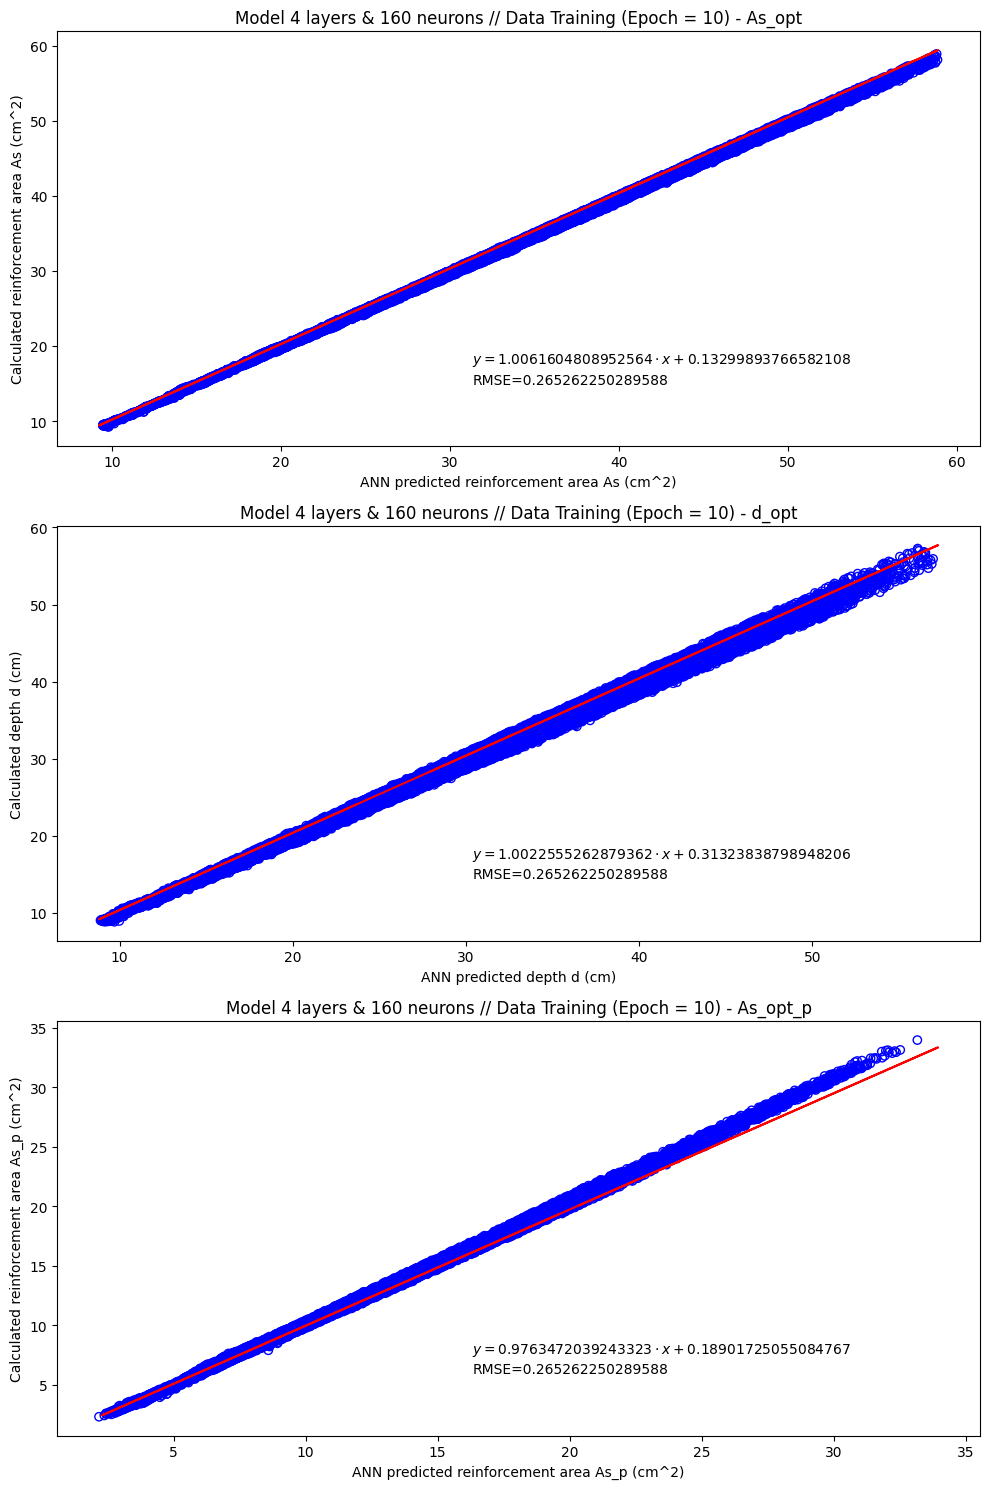

In [21]:
# COMPARING PREDICTED VALUES VS THEORETICAL VALUES
testing = mdl.predict(xtest)

# Las predicciones serán una lista de arrays, uno por cada salida
ypred1 = testing[0].flatten()  # Predicciones para As_opt
ypred2 = testing[1].flatten()  # Predicciones para d_opt
ypred3 = testing[2].flatten()  # Predicciones para As_opt_p

def rmse(ytrue,ypred):
  return tf.sqrt(tf.reduce_mean(tf.square(ytrue - ypred)))

RMSE=rmse(ytest1,ypred1)
RMSE=rmse(ytest2,ypred2)
RMSE=rmse(ytest3,ypred3)

# Coefficients
m1, b1 = np.polyfit(ytest1, ypred1, 1)
m2, b2 = np.polyfit(ytest2, ypred2, 1)
m3, b3 = np.polyfit(ytest3, ypred3, 1)

# Crear subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Lista de etiquetas y predicciones
etiquetas = [ytest1, ytest2, ytest3]
predicciones = [ypred1, ypred2, ypred3]
ms = [m1, m2, m3]
bs = [b1, b2, b3]

# Títulos de los gráficos
titulos = [
    f'Model {total_layers} layers & {total_neurons} neurons // Data Training (Epoch = {total_epochs}) - As_opt',
    f'Model {total_layers} layers & {total_neurons} neurons // Data Training (Epoch = {total_epochs}) - d_opt',
    f'Model {total_layers} layers & {total_neurons} neurons // Data Training (Epoch = {total_epochs}) - As_opt_p']

# Etiquetas de los ejes y
etiquetas_y = [
    'Calculated reinforcement area As (cm^2)',
    'Calculated depth d (cm)',
    'Calculated reinforcement area As_p (cm^2)']

# Etiquetas de los ejes x
etiquetas_x = [
    'ANN predicted reinforcement area As (cm^2)',
    'ANN predicted depth d (cm)',
    'ANN predicted reinforcement area As_p (cm^2)']

# Iterar sobre cada subplot
for i, (etiqueta, prediccion, m, b, titulo) in enumerate(zip(etiquetas, predicciones, ms, bs, titulos)):
    # Gráfico scatter
    axs[i].scatter(prediccion, etiqueta, facecolors='none', edgecolors='b')
    axs[i].plot(etiqueta, m * etiqueta + b, color='red')
    axs[i].text(0.45, 0.2, f'$y = {m} \\cdot x + {b}$', fontsize=10, transform=axs[i].transAxes)
    axs[i].text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=axs[i].transAxes)
    axs[i].set_xlabel(etiquetas_x[i])
    axs[i].set_ylabel(etiquetas_y[i])
    axs[i].set_title(titulo)

# Ajustar diseño de subplots
plt.tight_layout()
plt.show()

In [22]:
from tensorflow.keras.models import load_model

def rmse(ytrue,ypred):
  return tf.sqrt(tf.reduce_mean(tf.square(ytrue - ypred)))
# Cargar el modelo guardado
mdl = load_model(r'D:\ToolBox\py\proyect_1\RedesNeuronales\mdl_checkpoint.keras', custom_objects={'rmse': rmse})

In [29]:
import pandas as pd
#Datos de ETABS
fc = [50]
fy = [550]
Mu = [700]
b  = [1000]

#Almacenamiento de datos del ETABS
data_Etabs        = pd.DataFrame()
data_Etabs ['fc'] = fc
data_Etabs ['fy'] = fy
data_Etabs ['Mu'] = Mu
data_Etabs ['b']  = b 

#Evaluación en el Modelo entrenado por ANN
predictions = mdl.predict(data_Etabs)
y_As = predictions[0][0]  # Área de Acero (As)
y_d = predictions[1][0]   # Peralte efectivo (d)
y_Asp = predictions[2][0]  # Área de Acero compresión (Asp)

imprimir = f"El Área de Acero (As) es {y_As} cm^2, el peralte efectivo (d) es {y_d} cm y el Área de Acero compresión (Asp) es {y_Asp}"
print(imprimir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
El Área de Acero (As) es [77.18751] cm^2, el peralte efectivo (d) es [36.095] cm y el Área de Acero compresión (Asp) es [18.889738]
